In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob
from PIL import Image as im
from skimage.feature import hog
from skimage.transform import resize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score

# 1. Prétraitement:

# 1.1. Rajouter l’extension « .gif » aux 165 images de la base:

In [ ]:
def laod_images_opencv_extisions(data_path,saving_path): 
  for file_name in os.listdir(data_path): #cette commande fait des iteration en prenant un element du dossier dont le chemain est : data_path
    if  not 'txt' in file_name and not 'DS_Store' in file_name: # on elimine les fichiers .txt et DS_Store
      image = im.open(data_path + '/' + file_name) #On utlise le package im de la librerie PIL pour ovrir les images
      subject_num = file_name.split('.')[0] #On garde la partie avant l'extention 
      img_path = saving_path + '/' + subject_num + '/' + file_name + '.gif' #On ajoute l'exention gif
      if not os.path.isdir(saving_path + '/' + subject_num):
       os.mkdir(saving_path + '/' + subject_num)   #On cree les nouveau fichiers des images avec l'extention .gif
      if not os.path.isfile(img_path):
             image.save(img_path)
    else:
         print("Already Completed")





# Commentaires:


*   Dans cette étape, on a définie une fonction **laod_images_opencv_extisions** qui prend en deux arguments: le chemin du dossier qui contient les images, et le chemin du dossier qui contient les images en leurs ajoutant l'extension ".gif". cette fonction prend toutes les images et leurs ajoutent l'extension ".gif"




In [ ]:
laod_images_opencv_extisions('/content/drive/MyDrive/Projet_Tim/DataSet/yalefaces','/content/drive/MyDrive/Projet_Tim/DataSet/ajout_des_gif')

Already Completed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Commentaires:
On applique la fonction **laod_images_opencv_extisions** sur notre dossier d'images.

# 1.2.récupérer uniquement la tête de la personne:

In [ ]:
face_cascade=cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml") 
data_path=r'/content/drive/MyDrive/Projet_Tim/DataSet/ajout_des_gif'
new_path = '/content/drive/MyDrive/Projet_Tim/DataSet/new_path' #le chemin qui va contenir les nouvelle images coupées.
for file_name in os.listdir(data_path): #On va parcourir tous les fichiers dans notre dossier.
    p = os.makedirs(new_path+'/'+file_name)  
    for image in os.listdir(data_path+'/'+file_name):#Pour chaque image dans un fichier 
        gray = plt.imread(data_path+'/'+file_name+'/'+image) #lire l'image
        face = face_cascade.detectMultiScale(gray, 1.1 , 5) #cette fonction detecte le visage dans une image
        x=face[0][0]
        y=face[0][1]
        w=face[0][2]
        h=face[0][3]
        cv.rectangle(gray, (x,y), (x+w, y+h), (0,0,0), 2) #On va definir notre rectangle qui delimite le visage de la personne dans l'image.
        crop=gray[y:y+h,x:x+w] #Couper l'image suivant le rectangle predifinie.
        print(crop.shape)
        cv.imwrite(new_path+'/'+file_name+'/'+image+".png",crop ) #enregister l'image obtenue dans le nouveau dossier

(150, 150, 4)
(163, 163, 4)
(162, 162, 4)
(161, 161, 4)
(144, 144, 4)
(157, 157, 4)
(155, 155, 4)
(134, 134, 4)
(166, 166, 4)
(163, 163, 4)
(158, 158, 4)
(160, 160, 4)
(156, 156, 4)
(158, 158, 4)
(155, 155, 4)
(156, 156, 4)
(156, 156, 4)
(157, 157, 4)
(154, 154, 4)
(155, 155, 4)
(164, 164, 4)
(151, 151, 4)
(140, 140, 4)
(157, 157, 4)
(141, 141, 4)
(135, 135, 4)
(146, 146, 4)
(146, 146, 4)
(135, 135, 4)
(141, 141, 4)
(143, 143, 4)
(137, 137, 4)
(153, 153, 4)
(149, 149, 4)
(157, 157, 4)
(151, 151, 4)
(147, 147, 4)
(155, 155, 4)
(159, 159, 4)
(139, 139, 4)
(153, 153, 4)
(156, 156, 4)
(151, 151, 4)
(159, 159, 4)
(162, 162, 4)
(159, 159, 4)
(149, 149, 4)
(164, 164, 4)
(161, 161, 4)
(148, 148, 4)
(161, 161, 4)
(159, 159, 4)
(158, 158, 4)
(163, 163, 4)
(149, 149, 4)
(162, 162, 4)
(155, 155, 4)
(154, 154, 4)
(151, 151, 4)
(156, 156, 4)
(156, 156, 4)
(164, 164, 4)
(156, 156, 4)
(154, 154, 4)
(154, 154, 4)
(158, 158, 4)
(144, 144, 4)
(150, 150, 4)
(145, 145, 4)
(140, 140, 4)
(143, 143, 4)
(143, 

# Commentaires:
Dans cette étape, on a crée un nouveau dossier qui va contenir les images coupées, On a utiliser la fonction **face_cascade.detectMultiScale()** pour detecter le visage d'une personne dans une image et puis on a garder que cette partie, et a la fin on a enregistrée les images resultantes dans un autre dossier.

# 2. Génération des caractéristiques:

In [ ]:
vect_classes=["classe 1","classe 2","classe 3","classe 4","classe 5","classe 6","classe 7","classe 8","classe 9","classe 10","classe 11","classe 12","classe 13","classe 14","classe 15"]
#On cree un vecteur qui contient nos 15 classes ou chaque classe represente une personne.
df=[]
vect_gradient=[]
gradient = []
i=0
for file_name in os.listdir(new_path): #Parcourir les fichier d'images dans notre dossier.
  for image in os.listdir(new_path+'/'+file_name): #Pour chaque image dans le fichier
    im =plt.imread(new_path+'/'+file_name+'/'+image) # lire l'image
    im= resize(im,(128,64)) 
    fv, hog_image = hog(im, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize
                        =True, multichannel=True) # Calcule du vecteur de gradients
    vect_gradient.append(fv)
    gradient.append(hog_image)
  df_vect_gradient=pd.DataFrame(vect_gradient) #Chaque fichier on a cree un tableau qui contient tous les vecteur gradients puis on l'a converti en DataFrame
  vect_gradient=[]
  df_vect_gradient["classes"]=vect_classes[i] # Creation d'une colonne "classes" dont la valeur est la classe adequate pour chaque fichier
  df.append(df_vect_gradient) # ajouter cette dataframe comme element dans le tableau df
  i=i+1

  
  






    
    


In [ ]:
df[7]

,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.455023,0.106021,0.000000,0.102942,0.455023,0.0,0.000000,0.065425,0.007961,0.002342,...,0.224744,0.000000,0.000000,0.114708,0.345003,0.000000,0.000000,0.000000,0.000000,classe 8
1,0.415043,0.113654,0.004350,0.107449,0.415043,0.0,0.000000,0.000000,0.084414,0.037140,...,0.166059,0.000000,0.000000,0.087678,0.296472,0.088445,0.106629,0.296472,0.296472,classe 8
2,0.436051,0.155389,0.001869,0.077546,0.436051,0.0,0.000488,0.069154,0.081273,0.026098,...,0.223356,0.061970,0.024733,0.295262,0.330698,0.064179,0.011052,0.055630,0.071249,classe 8
3,0.448442,0.148495,0.004591,0.080256,0.448442,0.0,0.000000,0.067702,0.068507,0.019990,...,0.210995,0.036882,0.041215,0.105543,0.334964,0.028698,0.174180,0.211882,0.072470,classe 8
4,0.438471,0.160729,0.000000,0.080993,0.438471,0.0,0.067009,0.000000,0.078056,0.001118,...,0.179242,0.006794,0.038865,0.150484,0.320465,0.033440,0.054427,0.076588,0.135820,classe 8
5,0.415043,0.113654,0.004350,0.107449,0.415043,0.0,0.000000,0.000000,0.084414,0.037140,...,0.166059,0.000000,0.000000,0.087678,0.296472,0.088445,0.106629,0.296472,0.296472,classe 8
6,0.480578,0.139024,0.001844,0.125666,0.480578,0.0,0.000000,0.000000,0.023302,0.000736,...,0.306776,0.037507,0.006594,0.144777,0.306776,0.000000,0.165245,0.306776,0.180292,classe 8
7,0.374819,0.079727,0.000000,0.077713,0.374819,0.0,0.000000,0.000000,0.000000,0.373040,...,0.241885,0.021221,0.049057,0.118562,0.317110,0.025589,0.174030,0.153656,0.079967,classe 8
8,0.447242,0.153603,0.000000,0.078367,0.447242,0.0,0.000000,0.063181,0.063433,0.001869,...,0.238034,0.038635,0.026875,0.157693,0.325047,0.054149,0.051403,0.037044,0.045980,classe 8
9,0.433291,0.306027,0.000000,0.084442,0.433291,0.0,0.060051,0.000000,0.206268,0.030825,...,0.186014,0.013763,0.032731,0.154388,0.304477,0.044695,0.058784,0.126524,0.111406,classe 8


# Commentaires:
Le but de cette partie est de générer pour chaque image un vecteur caractéristique qui lui distingue des autres, les vecteurs caractéristiques des images de la meme classe sont proches tant que les vecteurs caracteristiques des images de classes différentes sont différents.(une variabilité interaclasse minimale et une variabilité extraclasse maximale.)
Dans cette partie on a :
* crée dabord un vecteur avec les noms des classes.
* Pour chaque image dans un fichier (Classe) On a calculer le vecteur de gradients a l'aide de la fonction **hog()** 
* On ajouter les résultats de toutes les images dans un tableau (le résultat est un tableau dont les éléments sont les vecteurs caracteristiques).
* On convertit le tableau en dataframe dont on ajoute la colonne "Classes" et on met sa valeur au nom de la classes pour tous les vecteurs (car ils appartient au meme classe).
* On ajoute cette data frame a un tableau.
* On répète ces étapes pour chaque fichier (Classe).
* A la fin, on aura un tableau dont les éléments sont les dataframes pour chaque classe (chaque data frame contient les vecteurs caracteristiques de tous les images de cette classe )

In [ ]:
dataset = pd.concat(df, ignore_index=True)
dataset


,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.425379,0.000000,0.125738,0.109828,0.425379,0.011971,0.037785,0.020707,0.015446,0.271117,...,0.377834,0.377834,2.163538e-08,0.097714,0.377834,0.000000,0.000000,0.000000,0.000000,classe 1
1,0.401569,0.172436,0.021836,0.123926,0.401569,0.000000,0.008755,0.023602,0.008910,0.205997,...,0.232920,0.016057,0.000000e+00,0.140555,0.383487,0.000501,0.013753,0.017683,0.115989,classe 1
2,0.412904,0.120733,0.039532,0.122995,0.412904,0.022730,0.016197,0.019199,0.023749,0.200829,...,0.231322,0.002647,6.683755e-03,0.132907,0.388887,0.023017,0.014811,0.046151,0.074911,classe 1
3,0.404495,0.137294,0.050953,0.157419,0.404495,0.015171,0.013868,0.009206,0.031224,0.129663,...,0.198197,0.007896,0.000000e+00,0.140346,0.398307,0.001925,0.000000,0.007430,0.104113,classe 1
4,0.411455,0.017346,0.114728,0.000000,0.411455,0.011885,0.000000,0.019344,0.027485,0.336265,...,0.468471,0.005951,4.117020e-03,0.227591,0.468471,0.013239,0.037332,0.030496,0.020796,classe 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.484811,0.009089,0.136763,0.116806,0.484811,0.000000,0.000000,0.000000,0.000385,0.000702,...,0.222285,0.000000,2.407026e-03,0.118857,0.310335,0.123432,0.134652,0.272819,0.310335,classe 15
161,0.404288,0.007686,0.105676,0.094103,0.404288,0.001567,0.000000,0.001550,0.020203,0.014004,...,0.121682,0.006869,3.164603e-03,0.112263,0.308361,0.133250,0.047887,0.308361,0.308361,classe 15
162,0.351112,0.072943,0.000000,0.073712,0.351112,0.000000,0.000000,0.000000,0.351112,0.013665,...,0.131848,0.044716,0.000000e+00,0.099651,0.328407,0.135468,0.093210,0.195713,0.328407,classe 15
163,0.366185,0.095441,0.006045,0.100024,0.366185,0.000000,0.000958,0.006931,0.216041,0.002926,...,0.177595,0.060706,3.034793e-02,0.086011,0.344645,0.071260,0.121601,0.170169,0.218170,classe 15


# Commentaires:
Dans cette etape, on va concatener toutes les dataframes obtenues dans une seule dataframe et comme  ça on aura notre dataset.

(array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <a list of 15 Patch objects>)

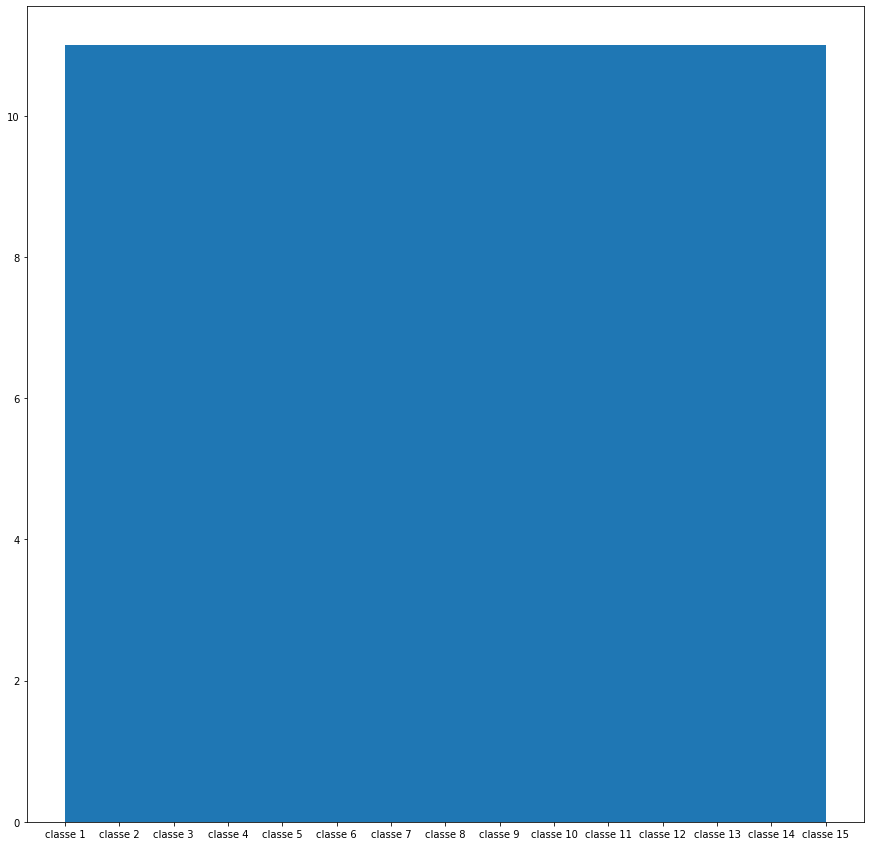

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(dataset['classes'],bins=15)

==> De cet histogramme, on voit bien que chaque classe contient 11 bien éléments.

(array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <a list of 15 Patch objects>)

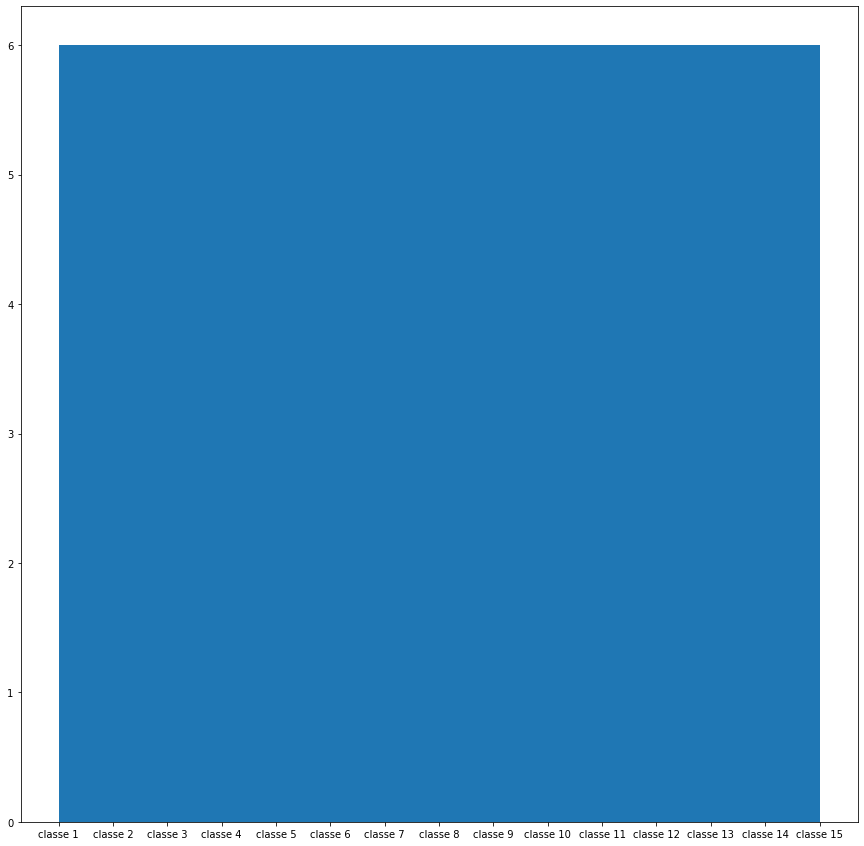

In [ ]:
i=0
X_train=pd.DataFrame()
Y_train=pd.DataFrame()
X_test=pd.DataFrame()
Y_test=pd.DataFrame()
for classe1 in vect_classes:
  datafram=pd.DataFrame()
  for classes in dataset['classes']:
    if classe1==classes:
      datafram=datafram.append(dataset.iloc[[i]])
      i=i+1
  x=datafram.drop(['classes'],axis=1)
  y=datafram['classes']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5, random_state=42)
  
  X_train=pd.concat([X_train,x_train])
  Y_train=pd.concat([Y_train,y_train])
  X_test= pd.concat([X_test,x_test])
  Y_test= pd.concat([Y_test,y_test])


   
plt.figure(figsize=(15,15))
plt.hist(Y_train[0],bins=15)
  
  



# Commentaire:
Ce cette étape on a voulu séparer chaque classe en 6 vecteurs pour l'apprentissage et les 5 restants pour le test, pour cela on q appliqué la fonction **train_test_split()** pour séparer les données de chaque classe puis on concatine ces données pour avoir l'ensemble finale de nos donnée de test et d'apprentissage.


==>D'aprés l'histogramme, on voit bien que chaque classe du training set contien 6 éléments équitablement.

# 3. Classification:

# **KNN**

## 1.Apprentissage et prediction

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam


 accuracy_score : 
[0.9733333333333334, 0.9466666666666667, 0.9733333333333334, 0.9466666666666667, 0.92, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9333333333333333, 0.9066666666666666, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9333333333333333, 0.9066666666666666]


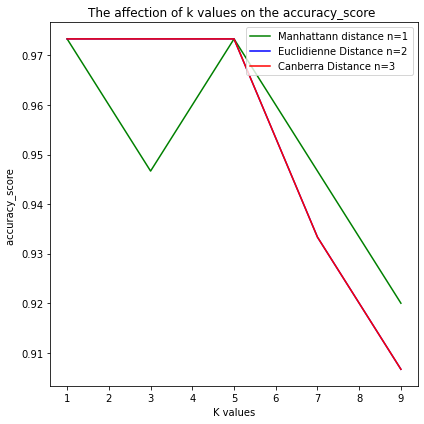

In [ ]:
n=1
k=1
train_test = []

while n<4  :
    k=1
    while k <10:
        #Apprentissage
        knn_clf = KNeighborsClassifier(n_neighbors = k, p = n)
        knn_clf.fit(X_train,Y_train)
        #peredictions
        y_predict = knn_clf.predict(X_test)
        train_test.append(accuracy_score(Y_test, y_predict))
        k=k+2
    n=n+1
print('\n accuracy_score : ' )
print(train_test)

#plot accuracy_score par rapport a la valeur de k
plt.figure(figsize=(6,6))
plt.plot([1,3,5,7,9],[train_test[0],train_test[1],train_test[2],train_test[3],train_test[4]],'g', label='Manhattann distance n=1')
plt.plot([1,3,5,7,9],[train_test[5],train_test[6],train_test[7],train_test[8],train_test[9]],'b', label='Euclidienne Distance n=2')
plt.plot([1,3,5,7,9],[train_test[10],train_test[11] ,train_test[12],train_test[13],train_test[14]],'r', label='Canberra Distance n=3')
plt.title("The affection of k values on the accuracy_score ")
plt.legend(loc="upper right")
plt.ylabel("accuracy_score ")
plt.xlabel("K values")
plt.tight_layout()
plt.show()







> ### Commentaires:

aprés avoir étudier les scores du modele par rapport au valeurs de k pour chaqu'une des 3 distances on remarque  :
- les courbes des distances Euclidienne et
Canberra sont supperposées car leurs valeurs d'accuracy sont identiques 
- on remarque que la valeur maximal est atteint quand k=1 (accuracy=0,98) et elle reste stable jusqu'a la valeur k=5 pour les distance Euclidienne et Canberra alors que pour la distance Manhattan elle descend en pic a la valeur k=3 puis elle remonte à k=5 (un minimat local)
- aprés la valeur k=5 les accuracy diminuent grandement pour les 3 distances ce qui est provoqué par un overfitting 

ainsi le meilleur résultat obtenu est atteint lorsque k=[1,5] pour les distances Euclidienne et
Canberr ou l'accuracy=0,98 ce qui jugé trés bon.




## 2.Matrice de confission

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.97


Text(0.5, 0.98, 'Confusion Matrix for this Dataset')

<Figure size 1224x1224 with 0 Axes>

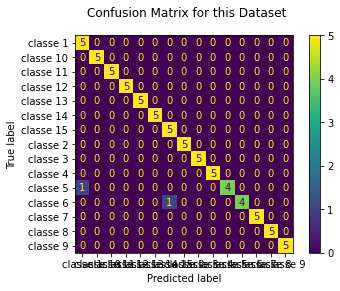

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn_clf.fit(X_train,Y_train)

y_predict = knn_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_predict)))

plt.figure(figsize=(17,17))
fig = plot_confusion_matrix(knn_clf, X_test, Y_test, display_labels=knn_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for this Dataset")



> ### **Analyse:**


On analysant la matrice de confusion, on remarque que la majorité des résultats prédis coinsident avec les y observés, ce qui veut dire que la majorité des résulats ont été correctement prédis, a part 2 valeur : 

-pour une entrée la sortie devrait etre classée 5 alors que le modèle lui a attribué la classe 1.

-pour une entrée la sortie devrait etre classée 6 alors que le modèle lui a attribué la classe 15.

# **MLP**

## 1.Apprentissage:

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50,30),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=300)

## 2.Predictions :

In [ ]:
y_pred = mlp_clf.predict(X_test)
print(y_pred)

print('==>  Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

['classe 1' 'classe 1' 'classe 1' 'classe 1' 'classe 1' 'classe 2'
 'classe 2' 'classe 2' 'classe 2' 'classe 2' 'classe 3' 'classe 3'
 'classe 3' 'classe 3' 'classe 3' 'classe 4' 'classe 4' 'classe 4'
 'classe 4' 'classe 4' 'classe 5' 'classe 5' 'classe 5' 'classe 5'
 'classe 5' 'classe 6' 'classe 6' 'classe 6' 'classe 6' 'classe 12'
 'classe 7' 'classe 7' 'classe 7' 'classe 7' 'classe 7' 'classe 8'
 'classe 8' 'classe 8' 'classe 8' 'classe 8' 'classe 9' 'classe 9'
 'classe 9' 'classe 9' 'classe 9' 'classe 10' 'classe 10' 'classe 10'
 'classe 10' 'classe 10' 'classe 11' 'classe 11' 'classe 11' 'classe 11'
 'classe 11' 'classe 12' 'classe 12' 'classe 12' 'classe 12' 'classe 12'
 'classe 13' 'classe 13' 'classe 13' 'classe 13' 'classe 13' 'classe 14'
 'classe 14' 'classe 14' 'classe 14' 'classe 14' 'classe 15' 'classe 15'
 'classe 15' 'classe 15' 'classe 15']
==>  Accuracy: 0.99



> ### Commentaires:
On a obtenue une présision de 99% sur les données de test ce qui est juger trés bon.

## 3.Matrice de confusion :

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Confusion Matrix for this Dataset')

<Figure size 1224x1224 with 0 Axes>

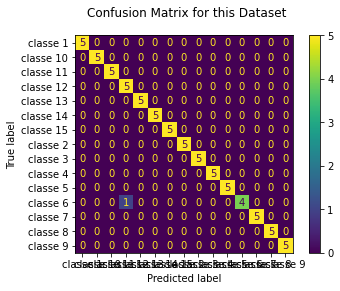

In [ ]:
plt.figure(figsize=(17,17))
fig = plot_confusion_matrix(mlp_clf, X_test, Y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for this Dataset")




> ### **Analyse:**


On analysant la matrice de confusion, on remarque que tous les résultats prédis coinsident avec les y observés, ce qui veut dire que tout nos  données de test ont été correctement prédis, a part  une seule valeur pour une entrée la sortie devrait etre classée 6 alors que le modèle lui a attribué à la classe 12.


## 4.Loss curve:

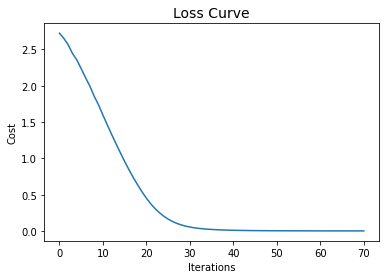

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()



> ### Commentaires:


Cette coube du loss fonction (fonction cout)  nous montre que cette fonction déminue et elle stabilise (atteint son minimum) au 30 iterations, donc on peut se limiter a 30 iterations et c'est suffisant pour converger nos paramètres.

# 8.Comparaison des deux méthodes de classification:

KNN et MLP donnent des performances presque similaires, sauf que MLP fonctionne légèrement mieux sur nos données de training et donne un taux d'erreur légèrement inférieur sur les données de test ( une seule valeur fause pour MLP et 2 valeur fausse pour KNN) .

les performances du modele MLP sont plus améliorées avec un score de **0,99** en comparaison avec celles du classifieur KNN qui a donner un score de **0,98** utilisé pour la reconaissance faciale   


Les performances du classificateur k-NN utilisé ici dépendent sur la distance et la valeur de k choisie pour le travail alors que les performances du model MLP dépendent sur le choix du nombre des couches cacher, ce dernier est basé sur la retropropagation c'est pour ça qu'il donne de meilleurs resultats, a chaque l'erreur est calculer et modifie les poids synaptiques de telle sorte que la fonction cout converge vers son minimum globale.



# 9.Quelles sont les images qui ont été mal classées ? Justifier

on remarque que dans les 2 matrice de confusion il y a une valeur de la classe 6 qui est mal representer dans les deux méthodes de classification, donc les images de la classe 6 sont mal classées Ce qui peut etre expliqué par le fait que les images de la classe 6 sont un peu similaires les émotions de la personne ne sont pas trés claires.

# 10.Propositions pour améliorer les les performances atteintes:
On peut ameliorer les performences de ces modeles, a travers:
*   Bien choisir les parametres (le nombre de couches cachees pour le MLP et le K pour le KNN ), ainsi que learning rate.
*   Fournir davantage d’échantillons de données: plus notre echantillon de depart sera grand plus on aura de pressision sur les donnees predites.
*  Centrer et reduire nos donnees pour les mettre sur le meme echelle.
* Examiner la courbe d’apprentissage pour voir si l’algorithme utilisé sur-apprend (overfitting) ou sous-apprend (underfitting) le problème étudié.



## **Conclusion:**
A travers ce projet, On a pu crée un modèle de reconaissance faciale qui va classifier des images de 15 personnes.


*   Pour cela, on a passer par plusieurs étapes:


# 1. Prétraitement: 
dans cette étape, on a préparer nos données(images)pour qu'elles soient prètent à l'utilisation, on les a converti en images, et on les a coupées pour garder juste la partie du visage.(il y a plusieurs types de prétraitements qui peuvent etre effectués selon le type de données d'entrées.)
# 2. Génération ces caractéristiques:
 dans cette étape on a calculer le vecteur caractéristique de chaque image, ce vecteur caractéristique vérifie l'hypothese **"minimiser la variabilité intraclasse et maximiser la variabilité extraclasse"**.
# 3. Classification: 
Aprés avoir séparer les données en données d'apprentissage et de test, on arrive a la dernière étape qui est la classification, dans ce projet on a crée deux modèles de classification à l'aide de deux méthodes:


*   Une méthode de classification par modélisation en utilisant l'algorithme des k plus proches voisins **KNN** : cet algorithme calcule les distances entre le vecteur caracteristique de l'image qu'on veut classer et les tous les vecteurs caracteristiques des images qui constitues l'ensemble d'apprentissage, et à la fin, il choisi la distance minimale si le k=1, mais si k>1 il va choissir les k distances minimale Par la suite, l'image inconnue est affectée après un vote majoritaire entre les k plus petites distances à la classe qui remportera le vote.
*   Une méthode de classification par séparation en utilisant l'algorithme des réseaux de neurones multichouches **MLP** : cet algorithme est compose d'une couche de neurones d'entrée dont le taille est la taille du vecteur caractéristique et une  couche de sortie dont la taille est le nombre de classes(dans notre projet  la taille est 15), entre la couche d'entrée et la couche de sortie il y a des couches cachées,au depart le vecteur caractéristique sera le input de la couche d'entrée ;aprés ses composantes vont subir une combinaison lineaire et puis on va applique la fonction sigmoide a ce résultat. Chaque couche cachée va prendre comme entrée la sortie de la couche qui la precède, on va procéder a des iterations pour converger notre solution ou à chaque fois on va calculer l'erreur (fonction cout) et on va mettre à jour les poids synaptiques(les coefficients de la combinaison lineaire ), du réseau en minimisant l'erreur quadratique moyenne E entre la sortie réelle et la sortie prédite Yt et Y respectivement(rétropropagation du gradient).

* Ces deux méthodes ont tous les deux résussi a nous donner d'excellents résultats avec des accuracy > 0.97, d'aprés les matrices de confusions, on peut juger que la méthode des réseaux de neurones multicouches a donnée des résultats mieux que la méthode des k plus proches voisin.
* L'estimation des paramétres (k pour l'algorithme KNN et les poids, le pas d'aprentissage, le momentum et le nombre des couches caches pour l'algorithme MLP ) est trés importante, par exemple un k trés petit(KNN) ou un nombre petit de couches cachées (MLP) peut induire un **underfitting** alors que un k trés grand (KNN) ou un nombre trés grand de couches cachées (MLP) peut induire un **underfitting**, c'est pour ça qu'il faut bien choisir ces paramétres.
*  la meme chose pour le paramétre learning rate (pas d'apprentissage) s'il est trés petit, on peut jamais arriver à la solution et s'il est trés grand on
risque de sauter d’un côté de la solution optimale à l’autre sans jamais se
rapprocher d'elle.





